In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", None)

# Intro to Machine Learning
Predicting customer churn using Logistic Regression 

Steps:
1. Data Cleaning
2. Split Dataset into training and test set
3. Data Preprocessing
4. Feature selection 
5. Train Model
6. Validate Model

## 1. Data Cleaning

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Missing values**

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.replace("", np.nan).isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.replace(" ", np.nan).isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#df["TotalCharges"].astype("float")

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We have 11 rows in df, in which TotalCharges are whitespaces

In [9]:
df.loc[df["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.loc[df["tenure"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.loc[df["tenure"] == 1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,5351-QESIO,Male,0,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.20,24.2,No
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7016,1471-GIQKQ,Female,0,No,No,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,No
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes


Impute the missing values in `TotalCharges` with 0, as those customers have not been charged anything yet

In [12]:
df.loc[df["TotalCharges"] == " ", "TotalCharges"] = 0

In [13]:
df.replace(" ", np.nan).isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Casting Features to Appropriate Types**

In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [17]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Look at binary columns**

In [18]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [19]:
df.nunique()[df.nunique() == 3]

MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
dtype: int64

In [20]:
df[["OnlineBackup", "DeviceProtection"]].apply(pd.value_counts)

,OnlineBackup,DeviceProtection
No,3088,3095
Yes,2429,2422
No internet service,1526,1526


In [21]:
df.nunique()[df.nunique() == 3].keys()

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract'],
      dtype='object')

In [22]:
df[df.nunique()[df.nunique() == 3].keys()].apply(pd.value_counts)

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
DSL,NaN,2421.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiber optic,NaN,3096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month-to-month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3875.0
No,3390.0,1526.0,3498.0,3088.0,3095.0,3473.0,2810.0,2785.0,NaN
No internet service,NaN,NaN,1526.0,1526.0,1526.0,1526.0,1526.0,1526.0,NaN
No phone service,682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
One year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1473.0
Two year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1695.0
Yes,2971.0,NaN,2019.0,2429.0,2422.0,2044.0,2707.0,2732.0,NaN


In [23]:
cat_col = ["InternetService", "Contract"]

In [24]:
[col for col in df.nunique()[df.nunique() == 3].keys() if col not in cat_col]

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [25]:
df[[col for col in df.nunique()[df.nunique() == 3].keys() if col not in cat_col]].apply(pd.value_counts)

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,3390.0,3498.0,3088.0,3095.0,3473.0,2810.0,2785.0
No internet service,NaN,1526.0,1526.0,1526.0,1526.0,1526.0,1526.0
No phone service,682.0,NaN,NaN,NaN,NaN,NaN,NaN
Yes,2971.0,2019.0,2429.0,2422.0,2044.0,2707.0,2732.0


In [26]:
to_bool = [col for col in df.nunique()[df.nunique() == 3].keys() if col not in cat_col]

In [27]:
df[to_bool] = np.where(df[to_bool] == "Yes", 1, 0)

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,0,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [30]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [31]:
id_col = ["customerID"]
target_col = ["Churn"]
cat_cols = [col for col in df.nunique()[df.nunique() < 5].keys() if col not in target_col]
num_col = [col for col in df.columns if col not in id_col + target_col + cat_cols]
bool_col = [col for col in df.nunique()[df.nunique() == 2].keys() if col not in target_col]

In [32]:
#[col for col in cat_cols if col in df.nunique[df.nunique() == 2].keys()]

## 2. Split dataset into training and test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_test_split(df, test_size=.2, random_state=7)

[      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
 2338  4277-BWBML    Male              0     Yes        Yes      72   
 4705  5760-FXFVO    Male              0      No         No       6   
 3514  6993-YCOBK    Male              0     Yes        Yes      60   
 1549  4237-RLAQD    Male              0      No         No       1   
 5757  5539-HIVAK  Female              1     Yes         No      28   
 ...          ...     ...            ...     ...        ...     ...   
 5699  6719-OXYBR    Male              0      No         No      15   
 2550  8129-GMVGI  Female              0     Yes        Yes      56   
 537   5844-QVTAT  Female              0     Yes        Yes      33   
 1220  0872-JCPIB    Male              0      No         No      17   
 4271  2819-GWENI  Female              0     Yes        Yes      28   
 
      PhoneService  MultipleLines InternetService  OnlineSecurity  \
 2338          Yes              0              No               0   
 4705   

In [35]:
type(train_test_split(df, test_size=.2, random_state=7))

list

In [36]:
train, test = train_test_split(df, test_size=.2, random_state=7)

In [37]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2338,4277-BWBML,Male,0,Yes,Yes,72,Yes,0,No,0,0,0,0,0,0,Two year,No,Bank transfer (automatic),19.95,1322.85,No
4705,5760-FXFVO,Male,0,No,No,6,Yes,0,Fiber optic,1,1,0,0,0,0,Month-to-month,Yes,Electronic check,78.95,494.95,No
3514,6993-YCOBK,Male,0,Yes,Yes,60,Yes,1,Fiber optic,1,0,1,1,1,1,Two year,Yes,Electronic check,110.60,6586.85,No
1549,4237-RLAQD,Male,0,No,No,1,Yes,0,DSL,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,45.85,45.85,Yes
5757,5539-HIVAK,Female,1,Yes,No,28,Yes,1,No,0,0,0,0,0,0,Month-to-month,No,Mailed check,25.70,734.60,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,6719-OXYBR,Male,0,No,No,15,Yes,0,Fiber optic,0,0,1,0,1,0,Month-to-month,No,Electronic check,85.30,1219.85,No
2550,8129-GMVGI,Female,0,Yes,Yes,56,Yes,0,No,0,0,0,0,0,0,Two year,No,Mailed check,20.05,1090.10,No
537,5844-QVTAT,Female,0,Yes,Yes,33,Yes,0,DSL,1,1,1,0,0,0,One year,Yes,Mailed check,58.45,1955.40,No
1220,0872-JCPIB,Male,0,No,No,17,Yes,1,DSL,1,0,0,0,0,1,Month-to-month,No,Bank transfer (automatic),65.75,1111.20,No


In [38]:
test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6632,9259-PACGQ,Female,0,Yes,No,34,Yes,1,DSL,1,1,0,1,0,0,Month-to-month,No,Electronic check,62.65,2274.90,Yes
3801,5914-DVBWJ,Female,1,No,No,18,Yes,1,Fiber optic,0,1,0,1,0,0,Month-to-month,Yes,Electronic check,85.45,1505.85,Yes
901,9734-YWGEX,Female,0,No,No,9,Yes,1,Fiber optic,0,0,1,0,1,1,Month-to-month,No,Credit card (automatic),98.30,923.50,Yes
1487,5035-PGZXH,Female,0,No,No,56,Yes,1,Fiber optic,0,1,1,0,1,1,One year,Yes,Electronic check,106.80,5914.40,No
1457,6362-QHAFM,Male,0,Yes,No,42,Yes,1,Fiber optic,0,0,1,1,1,1,One year,Yes,Electronic check,108.30,4586.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,1545-JFUML,Male,0,Yes,No,71,Yes,1,Fiber optic,1,1,1,0,1,0,Two year,Yes,Electronic check,99.00,6994.60,No
4668,1791-PQHBB,Female,0,No,Yes,2,Yes,0,DSL,1,0,0,0,0,1,Month-to-month,Yes,Credit card (automatic),61.20,125.95,No
6459,3256-EZDBI,Male,1,Yes,No,51,No,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Credit card (automatic),29.45,1459.35,No
5403,0292-WEGCH,Female,0,Yes,Yes,54,Yes,1,DSL,0,1,1,1,1,1,Month-to-month,Yes,Electronic check,86.20,4524.05,No


In [39]:
# split into x and y values
train_X = train[cat_cols + num_col].reset_index(drop=True)
train_y = train[target_col].reset_index(drop=True)

test_X = test[cat_cols + num_col].reset_index(drop=True)
test_y = test[target_col].reset_index(drop=True)

## 3. Data Preprocessing
**Apply standard scaling to numerical columns**

In [40]:
from sklearn.preprocessing import StandardScaler

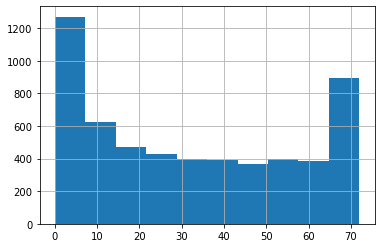

In [41]:
train_X["tenure"].hist();

In [42]:
std = StandardScaler()
scaled_fit = std.fit(train_X[num_col])

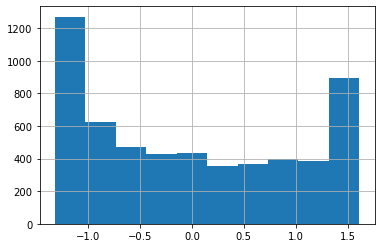

In [43]:
pd.DataFrame(scaled_fit.transform(train_X[num_col]), columns=num_col)["tenure"].hist();

In [44]:
num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

In [45]:
train_X.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,Yes,0,No,0,0,0,0,0,0,Two year,No,Bank transfer (automatic),72,19.95,1322.85
1,Male,0,No,No,Yes,0,Fiber optic,1,1,0,0,0,0,Month-to-month,Yes,Electronic check,6,78.95,494.95
2,Male,0,Yes,Yes,Yes,1,Fiber optic,1,0,1,1,1,1,Two year,Yes,Electronic check,60,110.60,6586.85
3,Male,0,No,No,Yes,0,DSL,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,1,45.85,45.85
4,Female,1,Yes,No,Yes,1,No,0,0,0,0,0,0,Month-to-month,No,Mailed check,28,25.70,734.60


**Create dummy variables from categorical features, except for booleans**

In [46]:
train_X["InternetService"].value_counts()

Fiber optic    2469
DSL            1946
No             1219
Name: InternetService, dtype: int64

In [47]:
pd.get_dummies(train_X["InternetService"], drop_first=True)

,Fiber optic,No
0,0,1
1,1,0
2,1,0
3,0,0
4,0,1
...,...,...
5629,1,0
5630,0,1
5631,0,0
5632,0,0


In [48]:
train_X = pd.get_dummies(data=train_X, 
               columns=[col for col in cat_cols if col not in bool_col],
               drop_first=True)

**Prep the boolean columns**

In [49]:
train_X = train_X.assign(Female=np.where(train_X["gender"] == "Female", 1, 0))

In [50]:
train_X = train_X.drop(columns="gender")

In [51]:
bool_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

In [52]:
bool_col.pop(0)

'gender'

In [53]:
bool_col

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

In [54]:
train_X[train_X[bool_col].dtypes[train_X[bool_col].dtypes == "object"].keys()]

,Partner,Dependents,PhoneService,PaperlessBilling
0,Yes,Yes,Yes,No
1,No,No,Yes,Yes
2,Yes,Yes,Yes,Yes
3,No,No,Yes,Yes
4,Yes,No,Yes,No
...,...,...,...,...
5629,No,No,Yes,No
5630,Yes,Yes,Yes,No
5631,Yes,Yes,Yes,Yes
5632,No,No,Yes,No


In [55]:
train_X[train_X[bool_col].dtypes[train_X[bool_col].dtypes == "object"].keys()] = np.where(train_X[train_X[bool_col].dtypes[train_X[bool_col].dtypes == "object"].keys()] == "Yes", 1, 0)

In [56]:
train_X

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Female
0,0,1,1,1,0,0,0,0,0,0,0,0,72,19.95,1322.85,0,1,0,1,0,0,0,0
1,0,0,0,1,0,1,1,0,0,0,0,1,6,78.95,494.95,1,0,0,0,0,1,0,0
2,0,1,1,1,1,1,0,1,1,1,1,1,60,110.60,6586.85,1,0,0,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,1,45.85,45.85,0,0,0,0,0,0,1,0
4,1,1,0,1,1,0,0,0,0,0,0,0,28,25.70,734.60,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,0,0,1,0,0,0,1,0,1,0,0,15,85.30,1219.85,1,0,0,0,0,1,0,0
5630,0,1,1,1,0,0,0,0,0,0,0,0,56,20.05,1090.10,0,1,0,1,0,0,1,1
5631,0,1,1,1,0,1,1,1,0,0,0,1,33,58.45,1955.40,0,0,1,0,0,0,1,1
5632,0,0,0,1,1,1,0,0,0,0,1,0,17,65.75,1111.20,0,0,0,0,0,0,0,0


**Building function to go through the same process on test_x**

Just combining all the steps above into a function for new use

In [57]:
def preprocess(X, trained_standardization_factors):
    scaled_X = trained_standardization_factors.transform(X[num_col])
    scaled_X = pd.DataFrame(scaled_X, columns=num_col)
    
    X = X.drop(columns=num_col, axis=1)
    X = X.merge(scaled_X, left_index=True, right_index=True, how="inner")
    
    X = X.assign(Female=np.where(X["gender"] == "Female", 1, 0))
    X = X.drop(columns="gender")
    
    X[X[bool_col].dtypes[X[bool_col].dtypes == "object"].keys()] = np.where(X[X[bool_col].dtypes[X[bool_col].dtypes == "object"].keys()] == "Yes", 1, 0)
    
    new_cat_cols = [col for col in cat_cols if col != "gender"]
    X = pd.get_dummies(data=X,
                       columns=[col for col in new_cat_cols if col not in bool_col],
                       drop_first=True)
    
    return X

In [58]:
test_X = preprocess(test_X, scaled_fit)

In [59]:
test_X.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,Female,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,1,1,0,1,0,0,0,0.065123,-0.071460,-0.003076,1,0,0,0,0,0,1,0
1,1,0,0,1,1,0,1,0,1,0,0,1,-0.586641,0.687074,-0.343603,1,1,0,0,0,0,1,0
2,0,0,0,1,1,0,0,1,0,1,1,0,-0.953258,1.114582,-0.601461,1,1,0,0,0,1,0,0
3,0,0,0,1,1,0,1,1,0,1,1,1,0.961298,1.397368,1.608455,1,1,0,1,0,0,1,0
4,0,1,0,1,1,0,0,1,1,1,1,1,0.391005,1.447272,1.020321,0,1,0,1,0,0,1,0


## 4. Train Model

In [60]:
train_y["Churn"] = np.where(train_y["Churn"] == "Yes", 1, 0)

In [77]:
train_y

0       0
1       0
2       0
3       1
4       0
       ..
5629    0
5630    0
5631    0
5632    0
5633    0
Name: Churn, Length: 5634, dtype: int64

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [89]:
# train model
lr = LogisticRegression()
lr.fit(train_X, train_y)

LogisticRegression()

In [90]:
lr.predict(test_X)[:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [84]:
test_y[:10]

0    1
1    1
2    1
3    0
4    0
5    1
6    1
7    0
8    0
9    0
Name: Churn, dtype: int64

In [91]:
accuracy_score(test_y, lr.predict(test_X))

0.8076650106458482

In [63]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [92]:
lr.predict_proba(test_X)[:10]



array([[0.90208421, 0.09791579],
       [0.43529402, 0.56470598],
       [0.36277241, 0.63722759],
       [0.69219212, 0.30780788],
       [0.66387461, 0.33612539],
       [0.73991329, 0.26008671],
       [0.54739357, 0.45260643],
       [0.34447541, 0.65552459],
       [0.86520865, 0.13479135],
       [0.50744621, 0.49255379]])

## Create functions


In [64]:
def load_and_clean(path: str) -> pd.DataFrame:
    df = pd.read_csv(path)
    
    df.loc[df["TotalCharges"] == " ", "TotalCharges"] = 0
    df["TotalCharges"] = df["TotalCharges"].astype(float)
    
    to_bool = df.nunique()[df.nunique() == 3].keys().to_list()
    cat_cols = ["InternetService", "Contract"]
    df[[col for col in to_bool if col not in cat_cols]] = np.where(df[[col for col in to_bool if col not in cat_cols]] == "Yes", 1, 0)
    
    df = df.assign(Female=np.where(df["gender"] == "Female", 1, 0))
    df = df.drop(columns="gender")
    
    bool_cols = [col for col in df.nunique()[df.nunique() == 2].keys() if col != "Churn"]
    df[df[bool_cols].dtypes[df[bool_cols].dtypes == "object"].keys()] = np.where(df[df[bool_cols].dtypes[df[bool_cols].dtypes == "object"].keys()] == "Yes", 1, 0)
    
    cat_cols = [col for col in df.nunique()[df.nunique() < 5].keys() if col != "Churn"]
    df = pd.get_dummies(data=df,
                        columns=[col for col in cat_cols if col not in bool_cols],
                        drop_first=True)
    
    df["Churn"] = np.where(df["Churn"] == "Yes", 1, 0)
    
    return df

In [65]:
def split_dataset(df: pd.DataFrame, test_size: float = .2, seed: int = None) -> tuple:
    train, test = train_test_split(df, test_size=test_size, random_state=seed)
    
    features = [col for col in df.columns if col not in ["customerID", "Churn"]]
    
    train_X = train[features].reset_index(drop=True)
    train_y = train["Churn"].reset_index(drop=True)
    test_X = test[features].reset_index(drop=True)
    test_y = test["Churn"].reset_index(drop=True)
    
    return train_X, train_y, test_X, test_y

In [66]:
def evaluate_model(train_X, train_y, test_X, test_y):
    lr = LogisticRegression()
    lr.fit(train_X, train_y)
    
    predictions = lr.predict(test_X)
    acc = accuracy_score(test_y, predictions)
    
    print(f"Our model achieved an accuracy of {acc}")

In [67]:
to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]
def rescale(train_set: pd.DataFrame, test_set: pd.DataFrame, to_scale: list) -> tuple:
    std = StandardScaler()
    scaled_fit = std.fit(train_set[to_scale])

    scaled = pd.DataFrame(scaled_fit.transform(train_set[to_scale]), columns=to_scale)

    train_set = train_set.drop(columns=to_scale, axis=1)
    train_set = train_set.merge(scaled, left_index=True, right_index=True, how="inner")

    scaled_test = pd.DataFrame(scaled_fit.transform(test_set[to_scale]), columns=to_scale)
    test_set = test_set.drop(columns=to_scale, axis=1)
    test_set = test_set.merge(scaled_test, left_index=True, right_index=True, how="inner")
    
    return train_set, test_set

In [68]:
train_X, train_y, test_X, test_y = split_dataset(load_and_clean("data/WA_Fn-UseC_-Telco-Customer-Churn.csv"), seed=7)

In [69]:
train_X, test_X = rescale(train_X, test_X, to_scale)

In [93]:
train_X

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Female,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.613062,-1.492048,-0.424633
1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,-1.075464,0.470826,-0.791218
2,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,0,1,0,1.124239,1.523791,1.906209
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-1.279140,-0.630379,-0.990075
4,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,-0.179289,-1.300751,-0.685104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,-0.708847,0.682084,-0.470240
5630,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0.961298,-1.488721,-0.527692
5631,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0.024388,-0.211190,-0.144547
5632,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.627376,0.031674,-0.518349


## Alter feature sets

In [94]:
train_X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'Female', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [95]:
to_keep = ["tenure", 
           "Contract_One year", 
           "Contract_Two year", 
           "TotalCharges", 
           "MonthlyCharges", 
           "Female"]

In [97]:
train_X2 = train_X[to_keep].copy()
test_X2 = test_X[to_keep].copy()

In [98]:
evaluate_model(train_X2, train_y, test_X2, test_y)

Our model achieved an accuracy of 0.7955997161107168


In [99]:
evaluate_model(train_X, train_y, test_X, test_y)

Our model achieved an accuracy of 0.8076650106458482


In [100]:
def evaluate_model(train_X, train_y, test_X, test_y, model):
    ml_model = model
    ml_model.fit(train_X, train_y)
    
    predictions = ml_model.predict(test_X)
    acc = accuracy_score(test_y, predictions)
    
    print(f"Our model achieved an accuracy of {acc}")

In [101]:
evaluate_model(train_X, train_y, test_X, test_y, LogisticRegression())

Our model achieved an accuracy of 0.8076650106458482


In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
evaluate_model(train_X, train_y, test_X, test_y, DecisionTreeClassifier())

Our model achieved an accuracy of 0.7402413058907026


In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
evaluate_model(train_X, train_y, test_X, test_y, RandomForestClassifier())

Our model achieved an accuracy of 0.7920511000709723
